<a href="https://colab.research.google.com/github/fequeiroz/artificial-inteligence/blob/main/III%20UNIDADE/sistema_de_recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import FixedLocator, FixedFormatter

from pylab import rcParams

%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BX-Book-Ratings.csv', sep=';' ,encoding="latin-1", error_bad_lines=False)
df_users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BX-Users.csv', sep=';', encoding="latin-1", error_bad_lines=False)
df_books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BX-Books.csv', sep=';', encoding="latin-1", error_bad_lines=False)


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:33

In [6]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
df_books = df_books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
df_books.rename(columns = {'Book-Title': 'Título', 'Book-Author': 'Autor', 'Year-Of-Publication': 'Ano', 'Publisher': 'Editora'}, inplace=True)
df_users.rename(columns = {'User-ID': 'Usuário', 'Location': 'Localização', 'Age': 'Idade'}, inplace=True)
df_ratings.rename(columns= {'User-ID': 'Usuário', 'Book-Rating': 'Avaliação'},inplace=True) 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


(array([716109.,   1770.,   2759.,   5996.,   8904.,  50974.,  36924.,
         76457., 103736., 146151.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

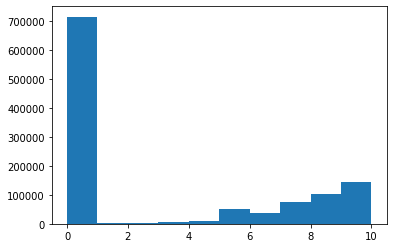

In [10]:

plt.hist(df_ratings['Avaliação'])



In [11]:
x = df_ratings['Usuário'].value_counts() > 50
print(x)
y = x[x].index
print(f'Quantidade de usuários que fizeram mais de 50 avaliações é {y.shape}')

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: Usuário, Length: 105283, dtype: bool
Quantidade de usuários que fizeram mais de 50 avaliações é (3371,)


In [12]:
df_ratings = df_ratings[df_ratings['Usuário'].isin(y)]
df_ratings_books = df_ratings.merge(df_books, on='ISBN')
df_ratings_books.head()

,Usuário,ISBN,Avaliação,Título,Autor,Ano,Editora
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books


In [13]:
number_rating = df_ratings_books.groupby('Título')['Avaliação'].count().reset_index()
number_rating

,Título,Avaliação
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
198798,Ã?Â?berraschung am Valentinstag.,1
198799,Ã?Â?lpiraten.,1
198800,Ã?Â?rger mit Produkt X. Roman.,3
198801,Ã?Â?stlich der Berge.,1


In [14]:
number_rating.rename(columns= {'Avaliação': 'Quantidade de avaliações'}, inplace=True)
tabela_finalizada = df_ratings_books.merge(number_rating, on = 'Título')
tabela_finalizada

,Usuário,ISBN,Avaliação,Título,Autor,Ano,Editora,Quantidade de avaliações
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,195
...,...,...,...,...,...,...,...,...
700843,276680,1582343594,0,City of Masks : A Cree Black Novel,Daniel Hecht,2004,Bloomsbury USA,1
700844,276688,0380790572,0,Jupiter Project,Gregory Benford,1998,Eos,1
700845,276688,0425150526,0,Death Crosses the Border,Janice Steinberg,1995,Berkley Publishing Group,1
700846,276688,0449907422,0,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993,Ballantine Books,1


In [15]:
tabela_finalizada = tabela_finalizada[tabela_finalizada['Quantidade de avaliações'] >= 20]
tabela_finalizada.drop_duplicates(['Usuário','Título'], inplace=True)
tabela_finalizada.shape

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(236372, 8)

In [16]:
df_book_pivot = tabela_finalizada.pivot_table(columns = 'Usuário', index='Título', values = 'Avaliação')
df_book_pivot.shape

(4928, 3293)

In [20]:
df_book_pivot.fillna(0, inplace=True)
df_book_pivot


Usuário,183,243,254,507,626,638,643,741,882,929,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Título,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"14,000 Things to Be Happy About",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from scipy.sparse import csr_matrix
matriz_sparce = csr_matrix(df_book_pivot)


In [22]:
model = NearestNeighbors(algorithm='brute')



In [25]:
model.fit(matriz_sparce)

NearestNeighbors(algorithm='brute')

# Validação 
 ### *Elbow Method*

In [43]:
X = df_book_pivot.iloc[:,:].values

wscc = []

for i in range(1, 11):

  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  kmeans.fit(X)

  wscc.append(kmeans.inertia_)


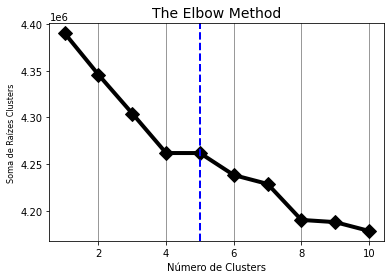

In [47]:
_ = plt.plot(range(1,11), wscc, linewidth = 4, color = 'black', marker = 'D', markersize = 10)
_ = plt.title('The Elbow Method', fontsize = 14, color = 'black')
_ = plt.xlabel('Número de Clusters', fontsize = 10, color = 'black')
_ = plt.ylabel('Soma de Raízes Clusters', fontsize = 8, color = 'black')
_ = plt.xticks(fontsize = 10, color = 'black')
_ = plt.yticks(fontsize = 10, color = 'black')
_ = plt.grid(which = 'both', color = 'black', axis = 'x', alpha = 0.5)

number_of_clusters = 5

_ = plt.axvline(x = number_of_clusters, linewidth = 2, color = 'blue', linestyle = '--')
_ = plt.show()

## Algumas sugestões

In [35]:
distances, suggestions = model.kneighbors(df_book_pivot.iloc[2,:].values.reshape(1,-1))


print(f'Se gostou de {df_book_pivot.index[suggestions[0][0]]}, pode gostar de: ')
for i in range(len(suggestions)):
    print(df_book_pivot.index[suggestions[i]])


Se gostou de 101 Dalmatians, pode gostar de: 
Index(['101 Dalmatians', 'Egg Monsters from Mars (Goosebumps, No 42)',
       'Falling Bodies', 'Lovely in Her Bones',
       'The Curse of the Mummy's Tomb (Goosebumps, No 5)'],
      dtype='object', name='Título')


In [36]:
distances, suggestions = model.kneighbors(df_book_pivot.iloc[6,:].values.reshape(1,-1))



print(f'Se gostou de {df_book_pivot.index[suggestions[0][0]]}, pode gostar de: ')
for i in range(len(suggestions)):
    print(df_book_pivot.index[suggestions[i]])

Se gostou de 1st to Die: A Novel, pode gostar de: 
Index(['1st to Die: A Novel',
       'When the Bough Breaks (Alex Delaware Novels (Paperback))',
       'Blood Test (Alex Delaware Novels (Paperback))', 'Black Market',
       'Red, White and Blue : A Novel'],
      dtype='object', name='Título')


In [37]:
distances, suggestions = model.kneighbors(df_book_pivot.iloc[10,:].values.reshape(1,-1))



print(f'Se gostou de {df_book_pivot.index[suggestions[0][0]]}, pode gostar de: ')
for i in range(len(suggestions)):
    print(df_book_pivot.index[suggestions[i]])

Se gostou de 24 Hours, pode gostar de: 
Index(['24 Hours', 'Remote Control', 'Gone to Soldiers',
       'Such Devoted Sisters', 'The Plan'],
      dtype='object', name='Título')


In [38]:
df_book_pivot.to_csv('df_book_pivot.csv')

In [39]:
distances, suggestions = model.kneighbors(df_book_pivot.iloc[1543,:].values.reshape(1,-1))



print(f'Se gostou de {df_book_pivot.index[suggestions[0][0]]}, pode gostar de: ')
for i in range(len(suggestions)):
    print(df_book_pivot.index[suggestions[i]])

Se gostou de Harry Potter and the Goblet of Fire (Book 4), pode gostar de: 
Index(['Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Order of the Phoenix (Book 5)',
       'Harry Potter and the Sorcerer's Stone (Book 1)'],
      dtype='object', name='Título')


In [40]:
distances, suggestions = model.kneighbors(df_book_pivot.iloc[2535,:].values.reshape(1,-1))



print(f'Se gostou de {df_book_pivot.index[suggestions[0][0]]}, pode gostar de: ')
for i in range(len(suggestions)):
    print(df_book_pivot.index[suggestions[i]])

Se gostou de One Hundred Years of Solitude, pode gostar de: 
Index(['One Hundred Years of Solitude', 'Mating', 'Garden of Rama',
       'Moonspun Magic', 'Thorns of Truth'],
      dtype='object', name='Título')
